### By Sintayehu Zekarias

# Import important library

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*--
import requests
from bs4 import BeautifulSoup
import os 
import matplotlib.pyplot as plt

## Get the category of the Addis Admas news page

In [3]:
url = "https://addisadmassnews.com/index.php?option=com_content&view=featured&Itemid=101"
data = requests.get(url)
html = BeautifulSoup(data.text, 'html.parser')
mainMenu = html.select('ul.menu')
menus=mainMenu[0].find_all('a')
categories=[]

for menu in menus:
    # detail_link =menu.find_all('a')
    url_category=menu['href']
    categories.append ({"url_category":url_category, "Category":  menu.get_text()})
    # print(detail_link)

    # print("https://addisadmassnews.com"+detail_link[0]['href'])

counter =0
for category in categories:
    baseurl= category['url_category']
    title= category['Category']

    print("Category" , counter,":", title)
    counter = counter+1

Category 0 : መነሻ ገፅ
Category 1 : ዜና
Category 2 : ርዕስ አንቀፅ
Category 3 : ባህል
Category 4 : ህብረተሰብ
Category 5 : ጥበብ
Category 6 : ኪነ-ጥበባዊ ዜና
Category 7 : ልብ ወለድ
Category 8 : የግጥም ጥግ
Category 9 : አግራሞት
Category 10 : ማራኪ አንቀፅ
Category 11 : ነፃ አስተያየት
Category 12 : የሰሞኑ አጀንዳ
Category 13 : ፖለቲካ በፈገግታ
Category 14 : ከአለም ዙሪያ
Category 15 : ጤና
Category 16 : ንግድና ኢኮኖሚ


## Scrap the content of each category 
### 1. Open each categroy
### 2. Create folder based on each category
### 3. Find the number of pages in each category
### 4. Based on number of pages scrap the contents of each data 
### 5. Save it on setp 2

In [ ]:
'''
Url to fetch consists of 2 parts:
category,baseurl, pages
'''

title_pages={}
category_label=""
category_count = 1
# Parent Directories 
parent_dir = os.getcwd() + "\\Category"

for category in categories:
    baseurl= category['url_category']
    title= category['Category']
   
    # print(baseurl, ":", title)
    if title != "መነሻ ገፅ" :
    
        baseurl = "https://addisadmassnews.com"+ baseurl + "&limitstart=" 
        
        

        # Leaf directory 
        directory = title
            
        
        # Path 
        path = os.path.join(parent_dir, directory) 
            
        # Create the directory 
        isExist = os.path.exists(path)
        if not isExist:
            os.makedirs(path) 


        page = 0
       

        my_data = []


        # get page numbers
        data = requests.get(baseurl+"0")
        html = BeautifulSoup(data.text, 'html.parser')
        pageLinks = html.select('div.pagination')
        pangeLink=pageLinks[0].find_all('a')

        total_page = int(pangeLink[-1]['href'].split('limitstart=')[1])
        # print(title,":", total_page)
        # title_pages[title]=total_page
        title_pages[str(category_count)]=total_page
        # category_label["Category" + str(category_count)]=title
        category_label = category_label + "Category " + str(category_count) + ":" + title + " , "
        category_count = category_count + 1

        # # scrap all pages
        while page < total_page:
            listingurl = baseurl + str(page) 
            data = requests.get(listingurl)
            # print(listingurl)

            html = BeautifulSoup(data.text, 'html.parser')
            articles = html.select('div.catItemHeader')

            for article in articles:
                
                # get title, author and creatd date
                title = article.select('.catItemTitle')[0].get_text()
                author = article.select('.catItemAuthor')[0].get_text()
                created_date = article.select('.catItemDateCreated')[0].get_text()

                # get the detail link to get the whole content of the tile
                detail_link =article.select('.catItemTitle >a')
                # print(x[0]['href'])

               
                 #  get the whole content of the detail_link
                inner_data = requests.get("https://addisadmassnews.com"+detail_link[0]['href'])

                inner_content_html = BeautifulSoup(inner_data.content, 'html.parser')
                fullText = inner_content_html.select('div.itemFullText')[0].get_text()

            
            

                my_data.append({"created_date": created_date, " author": author, " title": title, "full_text": fullText})

                author = author.split("Written by")[1]
                author = " ".join(author.split())
                # result =  "በ: " + author + "\n"+ title + "\n"+ fullText
                result =  title + "\n"+ fullText
            
                # file name cleaning
                created_date=" ".join(created_date.split())
                created_date = created_date.replace(",","")
                created_date = created_date.replace(":","")
                created_date = created_date 


                #Save the Data
                completeName = os.path.join(path, created_date+".txt") 
                file = open(completeName, "w" , encoding='utf-8') 
                # print(result)
                file.write(result)

                file.flush()
                file.close
                

            

            page += 10

        # pprint(my_data)

       

# Category Visualization

In [6]:


#Initialization
path = 'Category'
categoryList = os.listdir(path)
title_pages = {}



tokenized_word_list =[]
# Parent Directories 
parent_dir = os.getcwd()  + "\\" + "Category"
category_count =1
category_label = ""

for category in categoryList:

    #Initialization
    path = 'Category\\' + category 
    category_label = category_label + "Category " + str(category_count) + ":" + category + " , "
    myFileList = os.listdir(path)
    title_pages[str(category_count)]=len(myFileList)
    category_count = category_count + 1

   


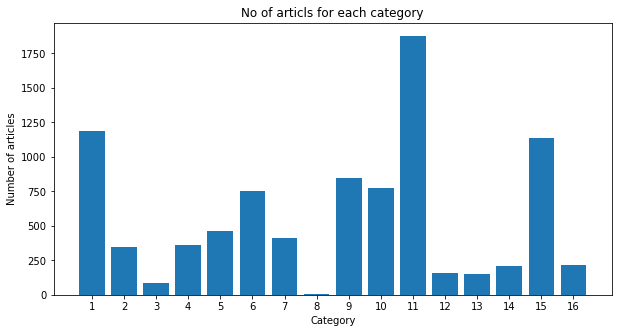

Category 1:ህብረተሰብ , Category 2:ልብ ወለድ , Category 3:ማራኪ አንቀፅ , Category 4:ርዕስ አንቀፅ , Category 5:ባህል , Category 6:ነፃ አስተያየት , Category 7:ንግድና ኢኮኖሚ , Category 8:አግራሞት , Category 9:ከአለም ዙሪያ , Category 10:ኪነ-ጥበባዊ ዜና , Category 11:ዜና , Category 12:የሰሞኑ አጀንዳ , Category 13:የግጥም ጥግ , Category 14:ጤና , Category 15:ጥበብ , Category 16:ፖለቲካ በፈገግታ , 


In [7]:

plt.figure(figsize=(10,5))

keys = title_pages.keys()
values = title_pages.values()
plt.bar(keys ,values)

plt.title("No of articls for each category")
plt.xlabel("Category")
plt.ylabel("Number of articles")
plt.show()
print (category_label)